<a href="https://colab.research.google.com/github/vimalalanguluri/Melanoma-Detection---Vimala/blob/main/Melanoma_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement
##### To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
## Importing the all necessary libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Updating the paths of Data set - Train and Test
data_dir_train = pathlib.Path("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118



This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Load Using Keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.
## Creating a Data Set
Defining some parameters for the loader

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

In [7]:
## Train Data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Validation Data Set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## All the classes of Skin Cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing the Data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

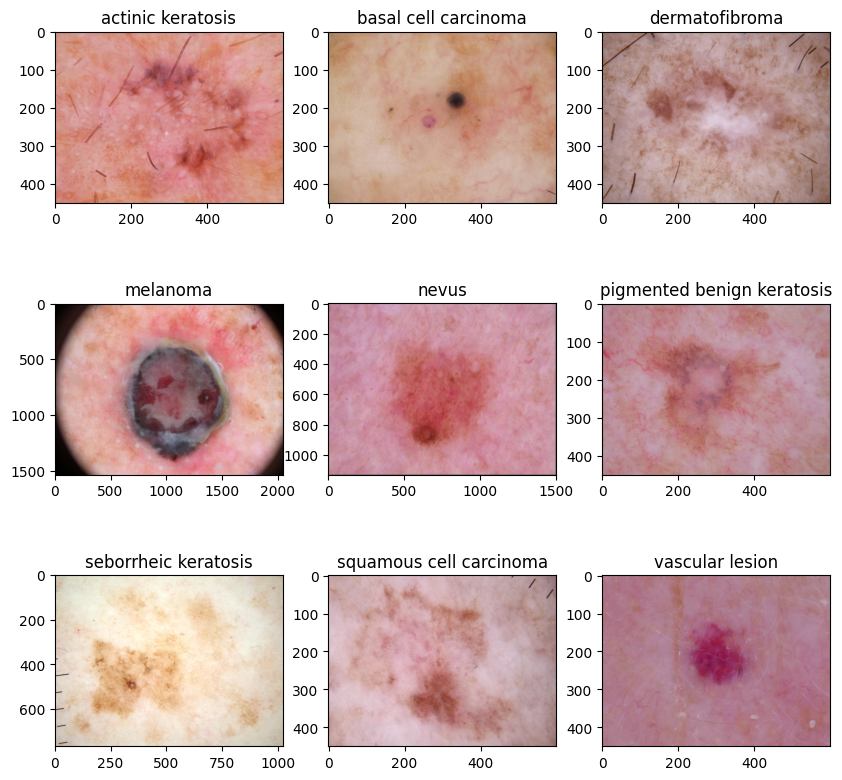

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [12]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
## Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

## Train the Model

In [15]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 917s 3s/step - loss: 2.0725 - accuracy: 0.1920 - val_loss: 2.0259 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 5s 90ms/step - loss: 2.0271 - accuracy: 0.2065 - val_loss: 2.0356 - val_accuracy: 0.1588
Epoch 3/30
56/56 [==============================] - 5s 89ms/step - loss: 1.9504 - accuracy: 0.2383 - val_loss: 2.6417 - val_accuracy: 0.2640
Epoch 4/30
56/56 [==============================] - 5s 91ms/step - loss: 1.9786 - accuracy: 0.2461 - val_loss: 1.9644 - val_accuracy: 0.2550
Epoch 5/30
56/56 [==============================] - 5s 89ms/step - loss: 1.9997 - accuracy: 0.2081 - val_loss: 2.0696 - val_accuracy: 0.2192
Epoch 6/30
56/56 [==============================] - 5s 90ms/step - loss: 1.9807 - accuracy: 0.2266 - val_loss: 1.9805 - val_accuracy: 0.2662
Epoch 7/30
56/56 [==============================] - 5s 90ms/step - loss: 1.8383 - accuracy: 0.3041 - val_loss: 1.7702 - val_accuracy: 0.3468
Epoch 8/30
56/56 [======

## Visualizing training results

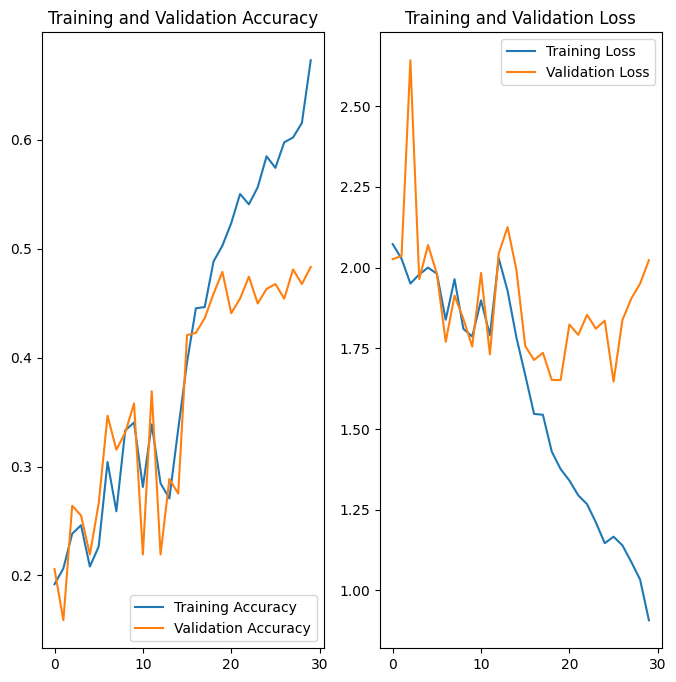

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Finding on the first base model**

*   The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch
*   The accuracy is just around 75-80% because there are enough features to remember the pattern.
*   But again, it's too early to comment on the overfitting & underfitting debate

In [17]:
## choosing an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

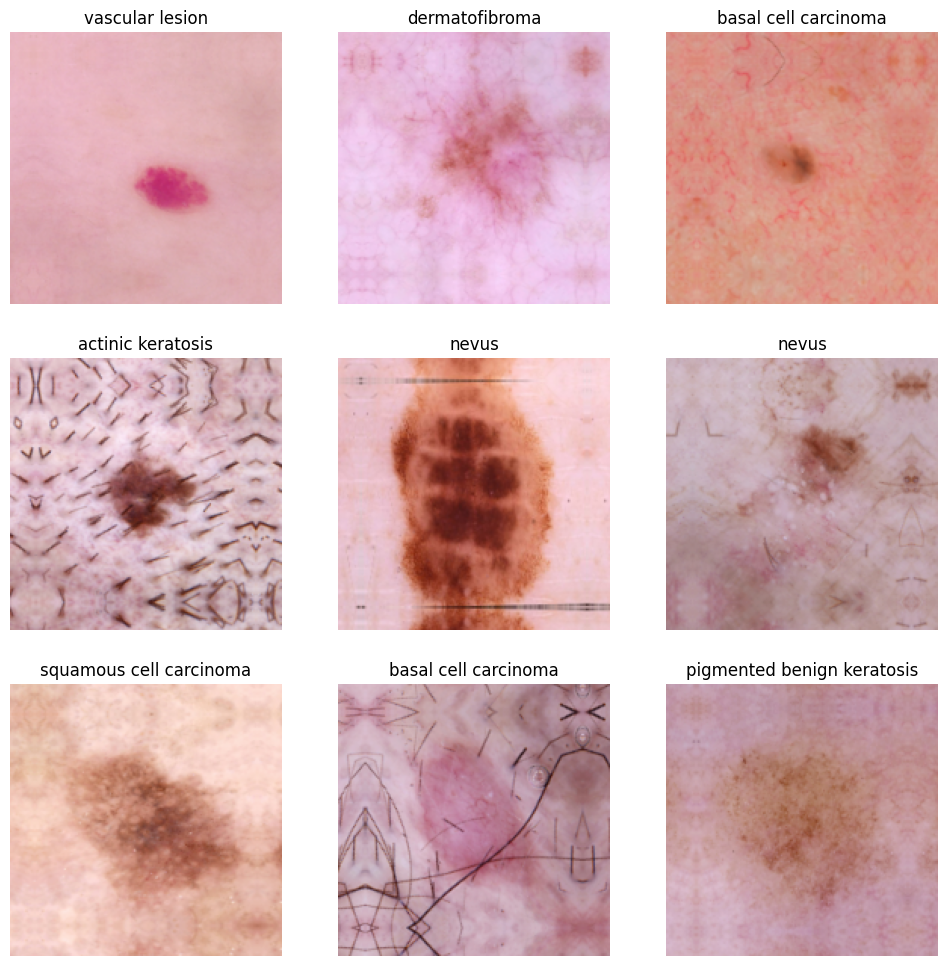

In [18]:
### visualizing how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Create the model, compile and train the model

In [20]:
## using Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compling the Model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the model

In [23]:
## Training our model for 30 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 6s 100ms/step - loss: 1.3301 - accuracy: 0.5184 - val_loss: 1.4642 - val_accuracy: 0.5302
Epoch 2/30
56/56 [==============================] - 5s 97ms/step - loss: 1.3211 - accuracy: 0.5234 - val_loss: 1.5633 - val_accuracy: 0.5145
Epoch 3/30
56/56 [==============================] - 6s 99ms/step - loss: 1.2896 - accuracy: 0.5335 - val_loss: 1.5978 - val_accuracy: 0.4989
Epoch 4/30
56/56 [==============================] - 6s 98ms/step - loss: 1.3166 - accuracy: 0.5324 - val_loss: 1.4805 - val_accuracy: 0.5235
Epoch 5/30
56/56 [==============================] - 6s 101ms/step - loss: 1.3060 - accuracy: 0.5402 - val_loss: 1.4242 - val_accuracy: 0.5324
Epoch 6/30
56/56 [==============================] - 6s 98ms/step - loss: 1.3017 - accuracy: 0.5335 - val_loss: 1.4119 - val_accuracy: 0.5503
Epoch 7/30
56/56 [==============================] - 5s 97ms/step - loss: 1.2815 - accuracy: 0.5346 - val_loss: 1.4223 - val_accuracy: 0.4966
Epoch 8/30


## Visualizing the Results

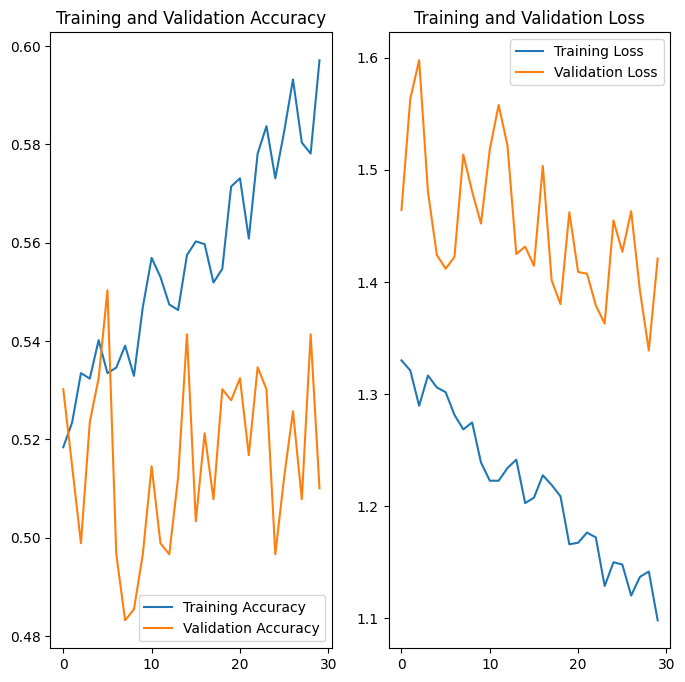

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings from the Second Model**

*   There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation
*   We can increase the epochs to increase the accuracy so it's too early for judgement

**Todo:**

distribution of classes in the training dataset.

**Context:**

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2235,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2236,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2237,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion


In [26]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2235,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2236,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
2237,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion


<BarContainer object of 9 artists>

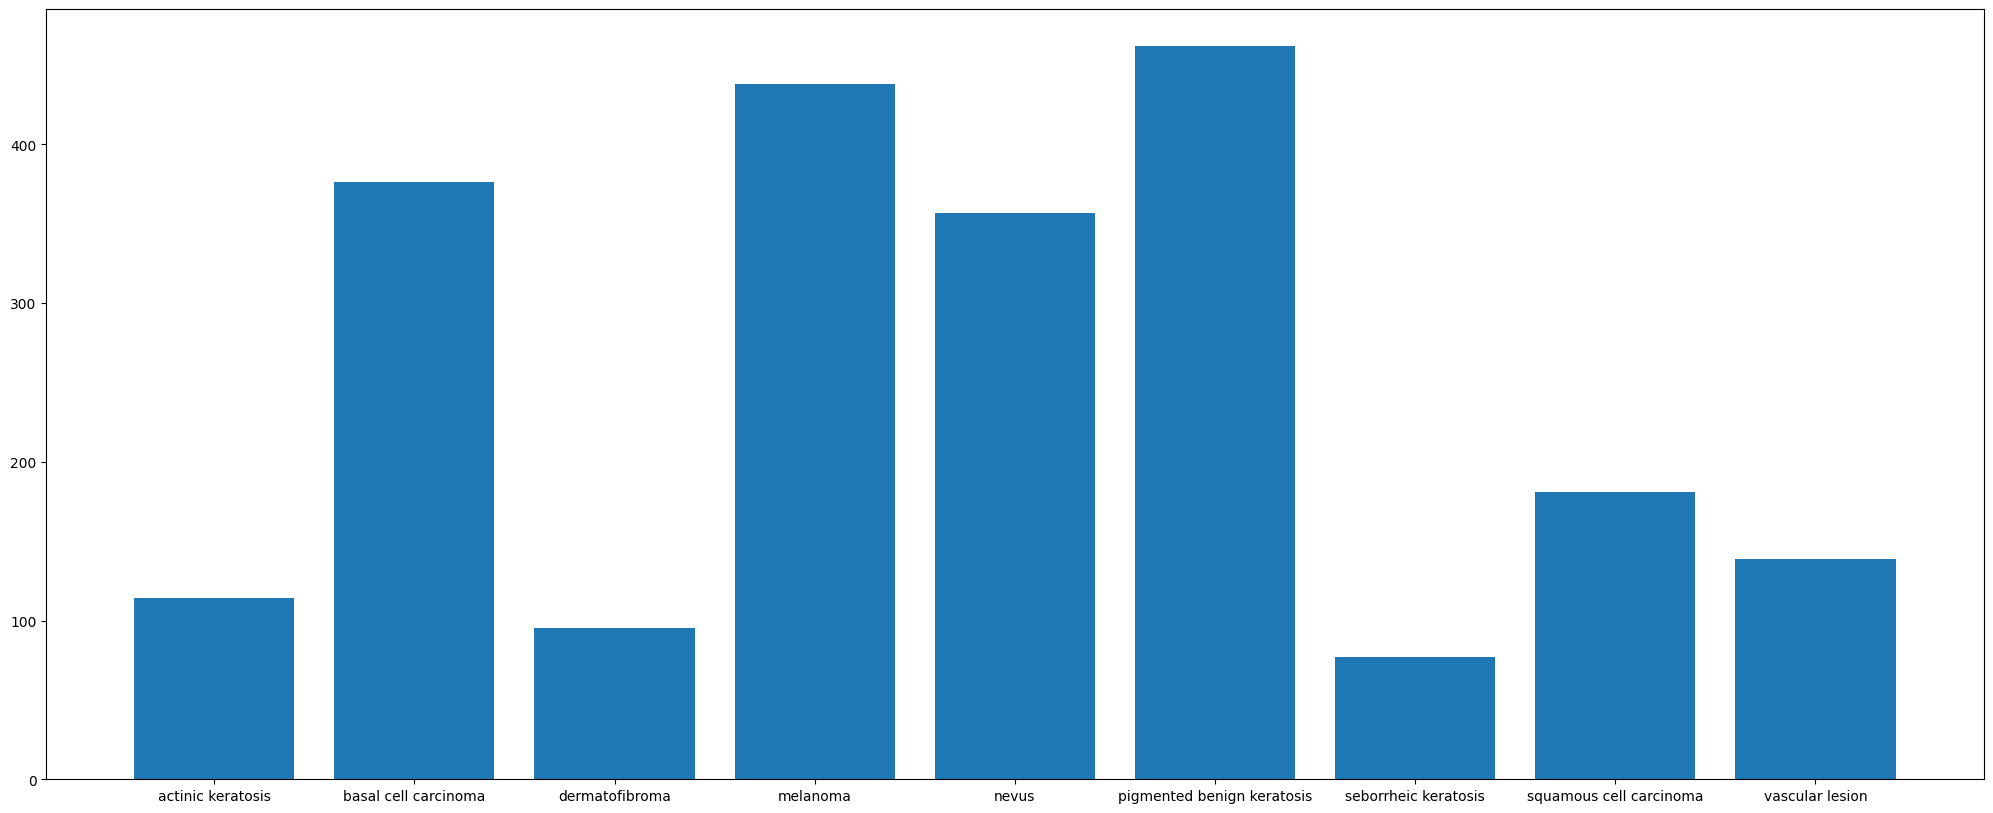

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Todo: Write your findings here:

**Which class has the least number of samples?**

squamous cell carcinoma has least number of samples

**Which classes dominate the data in terms proportionate number of samples?**

actinic keratosis and dermatofibroma have proportionate number of classes.

melanoma and pigmented benign keratosis have proprtionate number of classes

In [28]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [29]:
!pip install Augmentor

In [30]:
path_to_training_dataset="/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EF6B0211A20>: 100%|██████████| 500/500 [00:40<00:00, 12.20 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EF636419C90>: 100%|██████████| 500/500 [00:36<00:00, 13.85 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EF63662C9A0>: 100%|██████████| 500/500 [00:39<00:00, 12.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EF636612620>: 100%|██████████| 500/500 [00:41<00:00, 12.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EF6B00A15A0>: 100%|██████████| 500/500 [00:39<00:00, 12.54 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EF6362A9240>: 100%|██████████| 500/500 [00:42<00:00, 11.85 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7EF636267910>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EF63641A140>: 100%|██████████| 500/500 [00:45<00:00, 11.05 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7EF6363EF3A0>: 100%|██████████| 500/500 [00:38<00:00, 12.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [31]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [34]:
##
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Assignment/Ski...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
6735,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
6736,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion
6737,/content/drive/MyDrive/Melanoma_Assignment/Ski...,vascular lesion


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    1395
melanoma                      1302
basal cell carcinoma          1152
nevus                         1053
squamous cell carcinoma        524
vascular lesion                431
actinic keratosis              320
dermatofibroma                 316
seborrheic keratosis           246
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
import pathlib
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train")

In [41]:
data_dir_train1

PosixPath('/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train')

## Creating a Training dataset

In [42]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [44]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/Melanoma_Assignment/SkinCancerAssignment/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


## Creating a Validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


## Creating a model (include normalization)

In [46]:
## using Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compiling model (Choosing optimizer and loss function appropriately)

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the Model

In [48]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 48s 257ms/step - loss: nan - accuracy: 0.0189 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 39s 225ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 44s 254ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 42s 243ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 42s 243ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 39s 226ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 40s 228ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

## Visualizing the Model Results

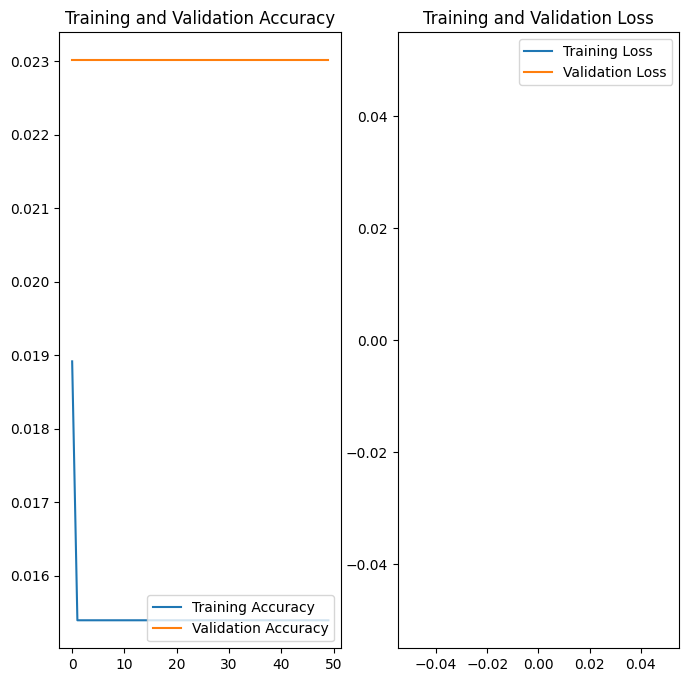

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


*   Accuracy on training data has increased by using Augmentor library
*   Model is still overfitting
*   The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.
*   The Model can be further improved by tuning the hyperparameter

